In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/gnapoles/data-mining-course/main/diabetes.csv")

data = (data - data.min()) / (data.max() - data.min())
target_name = 'Outcome'
X =data.drop(columns = [target_name])
y = data[target_name]
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [3]:
from sklearn.feature_selection import f_regression
correlation_scores = []
for i in X.columns:
    correlation_score = np.corrcoef(X[i], y)[0,1]
    correlation_scores.append((i, abs(correlation_score)))
    
    

correlation_scores

[('Pregnancies', 0.2218981530339869),
 ('Glucose', 0.466581398306874),
 ('BloodPressure', 0.06506835955033273),
 ('SkinThickness', 0.07475223191831937),
 ('Insulin', 0.1305479548840475),
 ('BMI', 0.2926946626444453),
 ('DiabetesPedigreeFunction', 0.17384406565295998),
 ('Age', 0.23835598302719765)]

In [4]:
correlation_scores.sort(key=lambda x: x[1], reverse=True)
correlation_scores

[('Glucose', 0.466581398306874),
 ('BMI', 0.2926946626444453),
 ('Age', 0.23835598302719765),
 ('Pregnancies', 0.2218981530339869),
 ('DiabetesPedigreeFunction', 0.17384406565295998),
 ('Insulin', 0.1305479548840475),
 ('SkinThickness', 0.07475223191831937),
 ('BloodPressure', 0.06506835955033273)]

In [5]:
np.corrcoef(X['Pregnancies'],y)

array([[1.        , 0.22189815],
       [0.22189815, 1.        ]])

In [6]:
k = 4
selected_feature = [i[0] for i in correlation_scores[:k]]
selected_feature

['Glucose', 'BMI', 'Age', 'Pregnancies']

In [7]:
X_selected = X[selected_feature]

In [8]:
X_selected.columns

Index(['Glucose', 'BMI', 'Age', 'Pregnancies'], dtype='object')

In [9]:
print("Selected feature names=",selected_feature)

Selected feature names= ['Glucose', 'BMI', 'Age', 'Pregnancies']


In [10]:
f_values, p_values = f_regression(X,y)
f_scores = list(zip(X.columns, f_values))
f_scores.sort(key=lambda x: x[1], reverse=True)
f_scores

[('Glucose', 213.1617521780385),
 ('BMI', 71.77207210224584),
 ('Age', 46.14061123873563),
 ('Pregnancies', 39.67022739361623),
 ('DiabetesPedigreeFunction', 23.871300204344482),
 ('Insulin', 13.28110753109629),
 ('SkinThickness', 4.304380905008462),
 ('BloodPressure', 3.2569503978891223)]

In [11]:
k=3
selected_feature_f = [i[0] for i in f_scores[:k]]
X_selected_f = X[selected_feature_f]
X_selected_f


,Glucose,BMI,Age
0,0.743719,0.500745,0.483333
1,0.427136,0.396423,0.166667
2,0.919598,0.347243,0.183333
3,0.447236,0.418778,0.000000
4,0.688442,0.642325,0.200000
...,...,...,...
763,0.507538,0.490313,0.700000
764,0.613065,0.548435,0.100000
765,0.608040,0.390462,0.150000
766,0.633166,0.448584,0.433333


In [12]:
correlation_with_target = X.apply(lambda col: col.corr(pd.Series(y)),axis=0)
correlation_with_target = abs(correlation_with_target).sort_values(ascending=False)
correlation_with_target

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

Text(0, 0.5, 'abs Correlation w/ target')

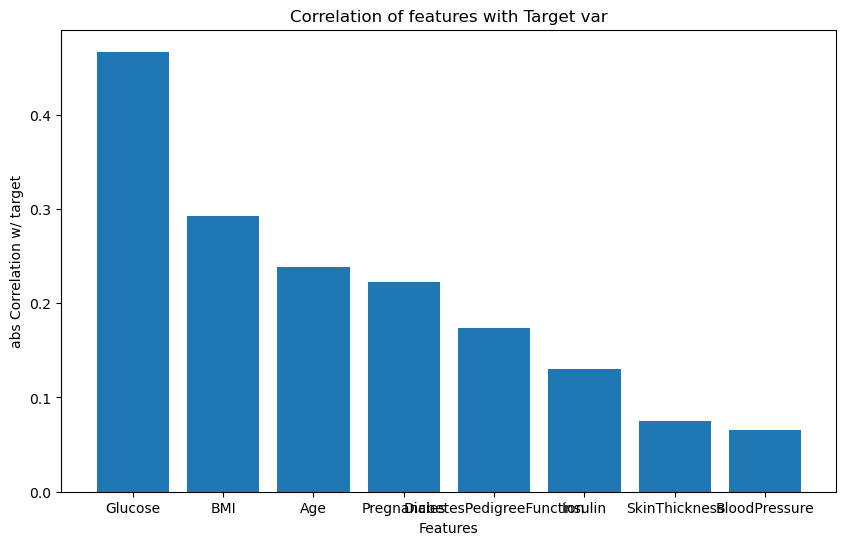

In [13]:
plt.figure(figsize=(10,6))
plt.bar(correlation_with_target.index, correlation_with_target)
plt.title('Correlation of features with Target var')
plt.xlabel('Features')
plt.ylabel('abs Correlation w/ target')

In [14]:
correlation_with_target

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [15]:
f_regression(X,y)

(array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
         13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124]),
 array([5.06512730e-10, 8.93543165e-43, 7.15139001e-02, 3.83477048e-02,
        2.86186460e-04, 1.22980749e-16, 1.25460701e-06, 2.20997546e-11]))

In [16]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.
 |  
 |     >>> list(zip('abcdefg', range(3), range(4)))
 |     [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]
 |  
 |  The zip object yields n-length tuples, where n is the number of iterables
 |  passed as positional arguments to zip().  The i-th element in every tuple
 |  comes from the i-th iterable argument to zip().  This continues until the
 |  shortest argument is exhausted.
 |  
 |  If strict is true and one of the arguments is exhausted before the others,
 |  raise a ValueError.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  

In [17]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
selected_features=[]
selected_feature_indices = []
best_accuracy = 0

clf=LogisticRegression(solver='liblinear', random_state=42)

while len(selected_features) < len(X.columns):
    best_feature = None
    best_feature_accuracy = 0
    
    for feature_idx,feature_name in enumerate(X.columns):
        if feature_idx not in selected_feature_indices:
            current_feature_indices = selected_feature_indices + [feature_idx]
            current_features = X_train.iloc[:, current_feature_indices]
            
            clf.fit(current_features, y_train)
            
            current_test_features = X_test.iloc[:, current_feature_indices]
            y_pred = clf.predict(current_test_features)
            
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_feature_accuracy:
                best_feature = feature_name
                best_feature_accuracy = accuracy
                best_feature_idx = feature_idx
                
        selected_features.append(best_feature)
        selected_feature_indices.append(best_feature_idx)
        
        if best_feature_accuracy > best_accuracy:
            best_accuracy = best_feature_accuracy
            
        else:
            break
            
print("Selected features:", selected_features)
print("Best accuracy:", best_accuracy)

Selected features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'SkinThickness', None, None, None]
Best accuracy: 0.7922077922077922


In [20]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)

In [21]:
fit=rfe.fit(X,y)

In [22]:
select_features = fit.support_

In [23]:
sel_wrapper = pd.DataFrame([list(fit.support_)], columns=data.columns[:-1])
sel_wrapper

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,True,True,False,False,False,True,False,False


In [24]:
lasso = Lasso(alpha=0.01
             )
lasso.fit(X,y)
sel_embedded = pd.DataFrame([list(lasso.coef_)], columns=data.columns[:-1])
sel_embedded

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.167692,0.935508,-0.0,0.0,0.0,0.17376,0.0,0.021214


In [25]:
lasso.coef_

array([ 0.16769163,  0.93550762, -0.        ,  0.        ,  0.        ,
        0.17376049,  0.        ,  0.02121377])

In [26]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso).
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term, controlling regularization
 |      strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.
 |  
 |      When `alpha = 0`, the objective is equivalent to ordinary least
 |      squares, solved by the :class:`LinearR